<a href="https://colab.research.google.com/github/mmorritti/Python_ITS/blob/main/pandas_matplot(graph)_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
#creo un date range
end_date = pd.to_datetime('1/12/2020',dayfirst=True)#trasforma la data in timestamp, primo giorno
dates = pd.date_range(end = end_date, periods=1000)#data fine,quanti giorni
dates

DatetimeIndex(['2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11',
               '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-17',
               ...
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29',
               '2020-11-30', '2020-12-01'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [ ]:
#creo un dataframe con date e due colonne con numeri casuali
values = np.random.randint(-100,100,size=(1000,2)) #numeri casuali, array 1000r e 2col
values

array([[  58,    5],
       [ -77,  -11],
       [  -9,   56],
       ...,
       [ -14,  -81],
       [ -26,  -51],
       [ -18, -100]])

In [ ]:
#creazione dataframe
df = pd.DataFrame(data=values, index=dates,columns=['x','y']) #dati numeri casuali, indice date, nome colonne
df

,x,y
2018-03-08,58,5
2018-03-09,-77,-11
2018-03-10,-9,56
2018-03-11,-35,91
2018-03-12,-84,66
...,...,...
2020-11-27,-14,-26
2020-11-28,-73,-96
2020-11-29,-14,-81
2020-11-30,-26,-51


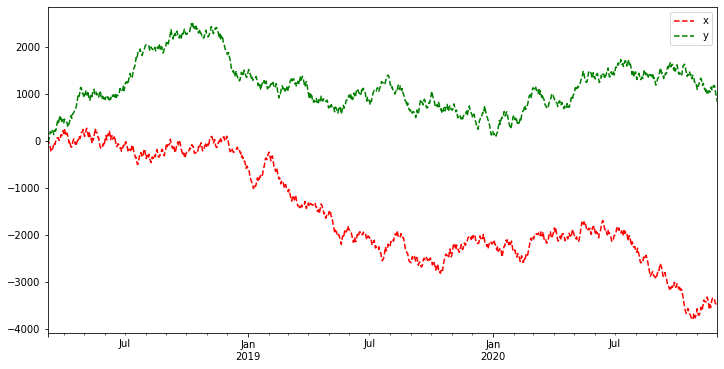

In [ ]:
#grafico
#cumsum(somma cumulativa dati array)
df.cumsum().plot(figsize=(12,6),style='--', color=('red','green'))#figsize(dimensione grafico),style(stile grafico),color(colore linee)

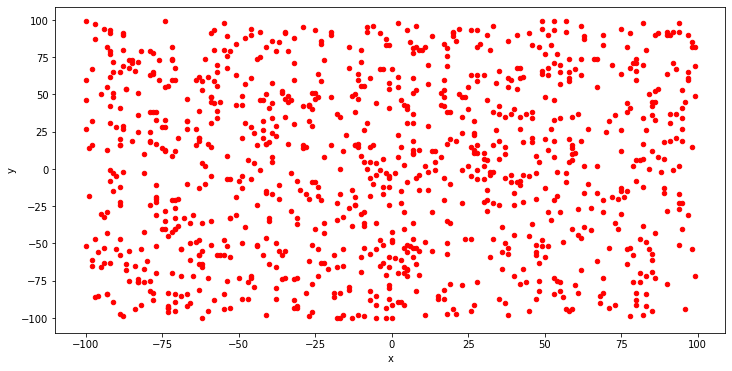

In [ ]:
#grafico a dispersione
df.plot(kind='scatter',x='x',y='y',figsize=(12,6), color=('red')) #kind(tipo grafico), valori da visualizzare

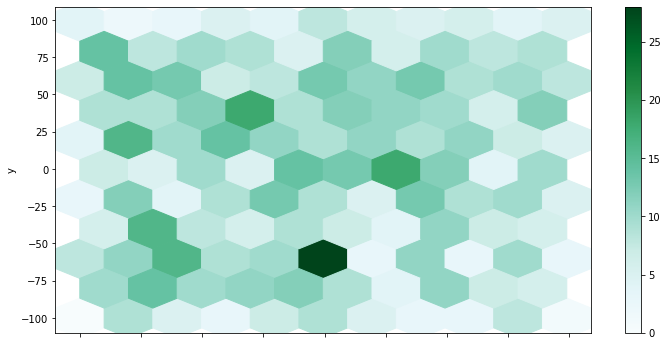

In [ ]:
#grafico hexbin
df.plot(kind='hexbin', x='x',y='y', figsize=(12,6), gridsize=10)#ogni esagono occupa un'area del piano e dentro quest'area c'è un certo numero di punti, più punti piu esagono scuro

In [4]:
#carico dataset auto
auto = pd.read_csv('/content/drive/MyDrive/Python/Dati-20201120/dataset auto.csv',sep=';')
auto

,make,fueltype,aspiration,doors,body,drive,engineloc,wheelbase,length,width,height,weight,enginetype,cylinders,enginesize,fuelsystem,bore,stroke,compression,horsepower,rpm,citympg,highwaympg,price,Unnamed: 24,Unnamed: 25
0,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four-or-less,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,NaN,NaN
1,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four-or-less,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,NaN,NaN
2,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,five-six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,NaN,NaN
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four-or-less,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,NaN,NaN
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five-six,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four-or-less,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,NaN,NaN
189,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four-or-less,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,NaN,NaN
190,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,five-six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,NaN,NaN
191,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,five-six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,NaN,NaN


In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         193 non-null    object 
 1   fueltype     193 non-null    object 
 2   aspiration   193 non-null    object 
 3   doors        193 non-null    object 
 4   body         193 non-null    object 
 5   drive        193 non-null    object 
 6   engineloc    193 non-null    object 
 7   wheelbase    193 non-null    float64
 8   length       193 non-null    float64
 9   width        193 non-null    float64
 10  height       193 non-null    float64
 11  weight       193 non-null    int64  
 12  enginetype   193 non-null    object 
 13  cylinders    193 non-null    object 
 14  enginesize   193 non-null    int64  
 15  fuelsystem   193 non-null    object 
 16  bore         193 non-null    float64
 17  stroke       193 non-null    float64
 18  compression  193 non-null    float64
 19  horsepow

In [72]:
auto.describe().loc[['min','max','mean'],:]#loc per selezionare degli elementi

,wheelbase,length,width,height,weight,enginesize,bore,stroke,compression,horsepower,rpm,citympg,highwaympg,price,Unnamed: 24,Unnamed: 25
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.07000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN,NaN
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.17000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,NaN,NaN
mean,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.24886,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907,NaN,NaN


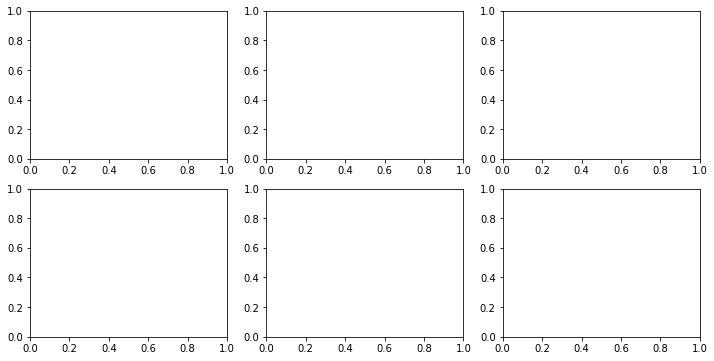

In [6]:
fig,ax = plt.subplots(2,3,figsize=(12,6))

In [82]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84b2d59860>,
      dtype=object)

In [8]:
#creo dati da graficare
counts = auto['make'].value_counts()#conteggio marche
counts

toyota           32
nissan           18
mitsubishi       13
honda            13
mazda            12
subaru           12
volkswagen       12
peugot           11
volvo            11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
alfa-romeo        3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

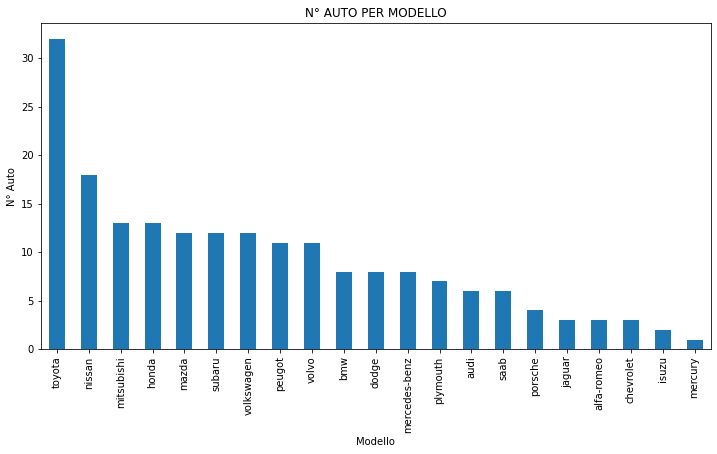

In [9]:
#grafico a barre
fig,ax = plt.subplots(figsize=(12,6))
counts.plot(kind='bar', ax=ax)
#titoli assi
ax.set_xlabel('Modello')
ax.set_ylabel('N° Auto')
#titolo grafico
ax.set_title('N° AUTO PER MODELLO')
plt.show()

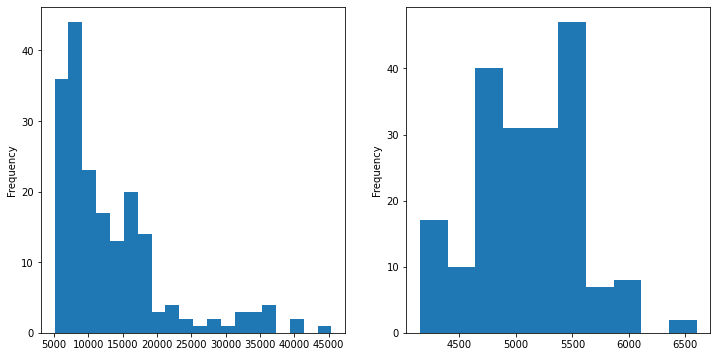

In [11]:
# istogramma prezzi,rpm subplots
fig, ax = plt.subplots(1,2, figsize=(12,6))
auto['price'].plot.hist(ax=ax[0],bins=20)#bins=numero di barre 
auto['rpm'].plot.hist(ax=ax[1])

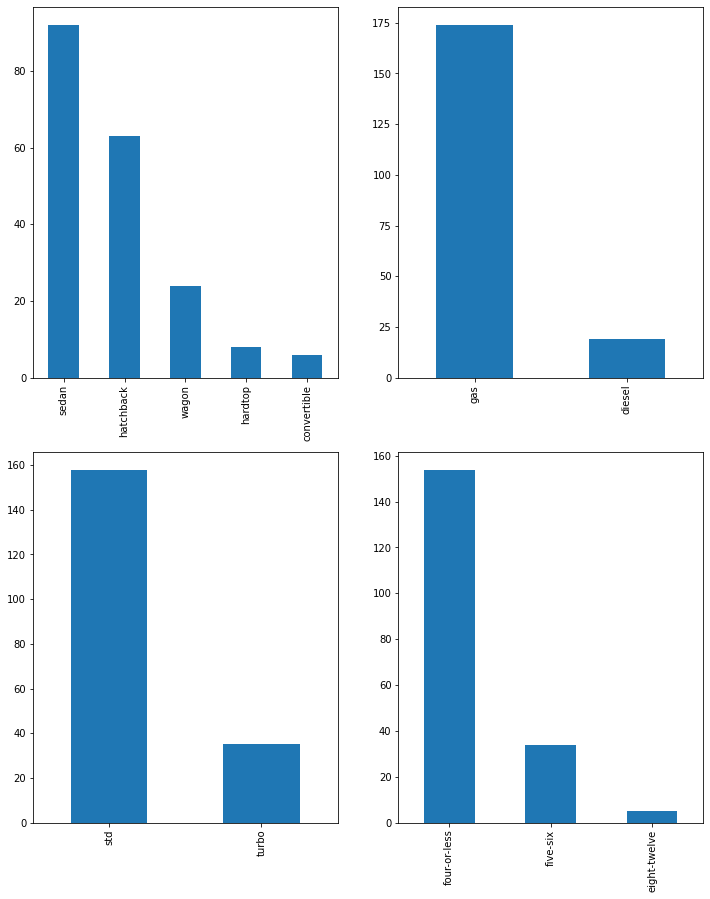

In [20]:
#4 grafici a barra
fig, ax = plt.subplots(2,2,figsize=(12,15)) #primi due valori dimensione dell'arrey di grafici
auto['body'].value_counts().plot.bar(ax=ax[0][0])
auto['fueltype'].value_counts().plot.bar(ax=ax[0][1])
auto['aspiration'].value_counts().plot.bar(ax=ax[1][0])
auto['cylinders'].value_counts().plot.bar(ax=ax[1][1])

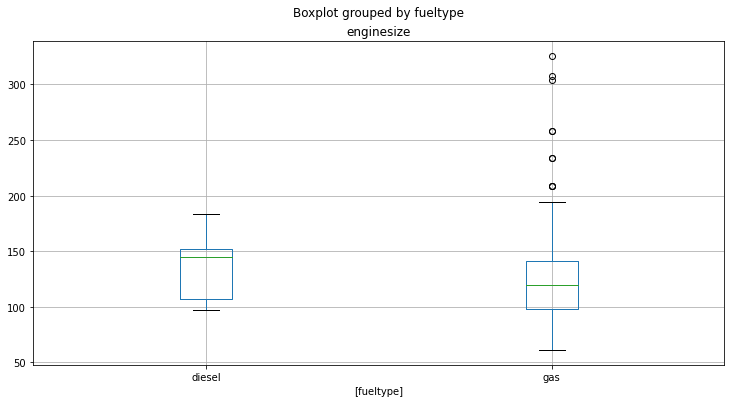

In [23]:
#boxplot
fig, ax=plt.subplots(figsize=(12,6))
auto[['enginesize','fueltype']].boxplot(by='fueltype',ax=ax)#raggruppa per fueltype

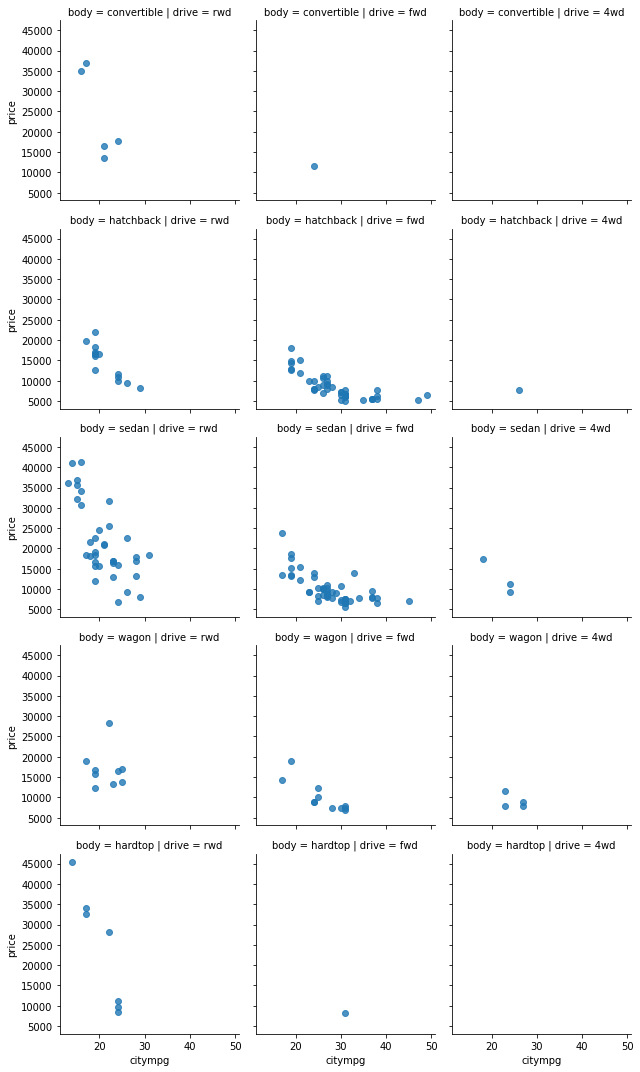

In [24]:
#grafico con seaborn
g = sns.FacetGrid(auto,col="drive",row="body")
g.map(sns.regplot,"citympg","price",fit_reg = False)